<a href="https://colab.research.google.com/github/MaryDongsn/GNG-5125-clustering/blob/master/Clustering_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import shuffle
from string import punctuation

from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree
from sklearn import neural_network

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# get the book list
bookList = gutenberg.fileids()
print(bookList)
# books=bookList[0,3,4,5,6,7,8,11]
books = np.array(bookList[3])
# books = np.append(books, bookList[3])
books = np.append(books, bookList[4])
books = np.append(books, bookList[6])
books = np.append(books, bookList[7])
books = np.append(books, bookList[11])
books = np.append(books, bookList[13])
books = np.append(books, bookList[15])

# print(books)
# segment

def sampling(number_samples, sample_size, book_name):
    labeled_records = []
    book = gutenberg.raw(book_name)
    # print(book)
    # tokenize the material of the book
    raw_words = nltk.word_tokenize(book)
    # print(raw_words)
    # Prepare 200 documents for each book
    headers = random.sample(range(0, len(raw_words)), number_samples)

    for header in headers:
        segment = raw_words[header:(header + sample_size + 1)]
        labeled_records.append((segment, book_name))
    return labeled_records


def data_cleaning(sample_words):
    # customize the punctuation list by adding extra string
    extra_string = "'-- ``'' "
    update_punctuation = punctuation + extra_string
    # customize the stopwords list by adding extra stopwords
    sw = stopwords.words('english')
    extra_stopwords = "n't", "'s", "ar't", "'d", "'ll", "i'll"
    sw.extend(extra_stopwords)
    # Remove punctuation
    remove_punct_words = [w for w in sample_words if w not in update_punctuation]
    # Change all letters to lowercase
    lowercase_words = [w.lower() for w in remove_punct_words]
    # Strip "_" at the beginning or end of a word
    strip_words = [w.strip('_') for w in lowercase_words]
    # Remember digits/numbers (keeps only words)
    remove_number_words = [w for w in strip_words if w.isalpha()]
    # Remove stop words
    final_words = [w for w in remove_number_words if w not in sw]
    return final_words
if __name__ == "__main__":
    try_number_samples = 200
    try_sample_size = 150
    final_list = []
    for book_name in books:
        # print (book_name)
        labeled_list = sampling(try_number_samples, try_sample_size, book_name)
        cleaned_labeled_list = []

        for samples in labeled_list:
            book_name = samples[1]

            cleaned_seg = data_cleaning(samples[0])
            cleaned_labeled_seg = (cleaned_seg, book_name)
            # print(cleaned_labeled_seg)
            cleaned_labeled_list.append(cleaned_labeled_seg)
        # print(cleaned_labeled_list)
        final_list = final_list + cleaned_labeled_list
    # shuffle the list
#     shuffle(final_list)
    #print(final_list)

    docs = []
    tags = []

    # word lemmatization
    lem = WordNetLemmatizer()
    for labeled_doc in final_list:
        docs.append(lem.lemmatize(' '.join(labeled_doc[0])))
        tags.append(labeled_doc[1])
#     print(docs)
    # import data to dictionary
    dic = {'Text': docs, 'File_name': tags}
    # apply pandas data frame
    df = pd.DataFrame(dic)
#     print(df)
    # df.columns = ['Text', 'File_name']
    df['book_id'] = df['File_name'].factorize()[0]
    book_id_df = df[['File_name', 'book_id']].drop_duplicates().sort_values('book_id')
    book_to_id = dict(book_id_df.values)
    id_to_book = dict(book_id_df[['book_id', 'File_name']].values)
    
    # feature engineering： TF-IDF
#     tfidf = TfidfVectorizer(sublinear_tf=True, encoding='latin-1', ngram_range=(1, 2), stop_words='english')
    tfidf = TfidfVectorizer(stop_words='english')
    features = tfidf.fit_transform(df.Text)
#     print(features)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [2]:
# print(round(len(lemmatize_words)/counter))  # if counter = 50, for each sample/book, length is different
# sample_length = round(len(df.Text.values)) / counter) - 10  # length of each sample, -10 to avoid overlapping
# start = 100
# stop = len(df.Text.values)
# slice_index = sorted(random.sample(range(start, stop + 1), counter))
# for j in range(counter):
#     a = slice_index[j]
#     xtrainset.append(lemmatize_words[a:a + sample_length])
#     ytrainset.append(raw[i][1])

from urllib import request
import pandas as pd
import random
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from pprint import pprint

# print(docs)
#print(final_list)
# print(df.Text.values)
new_final_list=[]
for tuple_list in final_list:
  new_list=tuple_list[0]
  new_final_list.append(new_list) 
#print (new_final_list)

id2word = Dictionary(new_final_list)

corpus =[]
corpus = [id2word.doc2bow(text) for text in new_final_list]
lda_model = LdaModel(corpus=corpus, num_topics=7, id2word=id2word, random_state=100, update_every=1, chunksize=1000,
                    passes=10, alpha='auto', per_word_topics=True)

pprint(lda_model.print_topics())
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda1 = CoherenceModel(model=lda_model, texts=new_final_list, dictionary=id2word, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
coherence_model_lda2 = CoherenceModel(model=lda_model, texts=new_final_list, dictionary=id2word, coherence='u_mass')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nC_V Score: ', coherence_lda1)
print('\nU_Mass Score: ', coherence_lda2)

[(0,
  '0.024*"said" + 0.013*"alice" + 0.008*"little" + 0.007*"like" + 0.006*"one" '
  '+ 0.005*"upon" + 0.005*"would" + 0.005*"could" + 0.005*"went" + '
  '0.004*"know"'),
 (1,
  '0.018*"ham" + 0.013*"lord" + 0.010*"king" + 0.009*"haue" + 0.007*"let" + '
  '0.007*"come" + 0.007*"hor" + 0.006*"thou" + 0.006*"hamlet" + 0.006*"good"'),
 (2,
  '0.008*"like" + 0.008*"happy" + 0.007*"sweet" + 0.007*"day" + 0.007*"joy" + '
  '0.007*"love" + 0.006*"us" + 0.006*"night" + 0.006*"never" + 0.005*"heaven"'),
 (3,
  '0.007*"thoughts" + 0.005*"night" + 0.004*"deep" + 0.004*"earth" + '
  '0.004*"father" + 0.004*"hath" + 0.003*"one" + 0.003*"yet" + 0.003*"lost" + '
  '0.003*"old"'),
 (4,
  '0.022*"little" + 0.018*"buster" + 0.013*"one" + 0.013*"bear" + '
  '0.010*"could" + 0.010*"joe" + 0.009*"green" + 0.008*"said" + 0.007*"boy" + '
  '0.007*"farmer"'),
 (5,
  '0.017*"thou" + 0.015*"thy" + 0.015*"shall" + 0.014*"thee" + 0.010*"heaven" '
  '+ 0.009*"god" + 0.008*"thus" + 0.007*"unto" + 0.007*"lord" + 0

In [3]:
!pip install pyLDAvis

In [4]:

import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.100466 -0.099020       1        1  22.483931
0      0.115330  0.025834       2        1  21.653994
4      0.195418  0.072383       3        1  18.063107
1     -0.180139  0.218234       4        1  15.668728
2     -0.049843 -0.146275       5        1   9.465302
6      0.088778  0.000216       6        1   6.874389
3     -0.069078 -0.071371       7        1   5.790546, topic_info=        Term        Freq       Total Category  logprob  loglift
3415  buster  282.000000  282.000000  Default  30.0000  30.0000
8887     ham  244.000000  244.000000  Default  29.0000  29.0000
137     said  657.000000  657.000000  Default  28.0000  28.0000
24    little  568.000000  568.000000  Default  27.0000  27.0000
26      lord  308.000000  308.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
623    would   13.085045  274.634552   Topic7  -5.9438  -0.1950
24    little   14.037941  568.148438   Topic7  -5.8735  -0.8517
43     shall   12.993134  435.159607   Topic7  -5.9509  -0.6623
96      hand   11.628081  110.993484   Topic7  -6.0618   0.5929
249     away   11.362936  167.695984   Topic7  -6.0849   0.1571

[501 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6834      5  0.841822  absolute
5802      7  0.858044    action
2589      1  0.837463      adam
2589      4  0.108560      adam
2589      6  0.046526      adam
...     ...       ...       ...
180       2  0.191875       yet
180       3  0.056159       yet
180       4  0.191875       yet
180       5  0.070198       yet
180       7  0.079558       yet

[1044 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 5, 2, 3, 7, 4])

In [5]:
# dimension reducing
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(features.toarray())

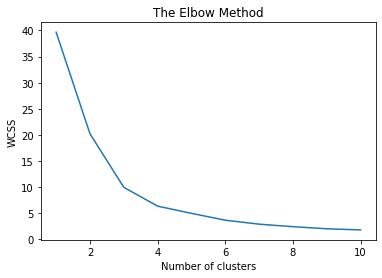

In [6]:
# K-Means Clustering
from sklearn.cluster import KMeans
# Using the elbow method to find the optimal number of clusters (7)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y_sklearn)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#KMeans clustering
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
model.labels_
# array([4, 0, 0, ..., 2, 4, 3])

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [9]:
kmeans_predict = model.predict(features)
print (kmeans_predict)

[3 3 3 ... 0 0 0]


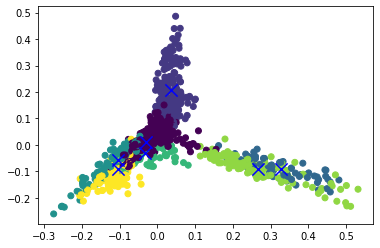

In [10]:
# visualization of KMeans
reduced_cluster_centers = sklearn_pca.transform(model.cluster_centers_)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=model.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [11]:
# count the ratio of cluster id in each cluster
# return stat - display the predicted clusters' id distribution
# return new_id - the clusters' id array following the original doc order
def statistics(predict):
    stat = []
    new_id = []
    for i in range(0, 1400, 200):
        ratio = []
        most_possible_id = 0
        max_count = 0
        for j in range(7):
            # count = predict[i:i + 200].count(j)
            counter = collections.Counter(predict[i:i + 200])
            count = counter[j]
            ratio.append(count / 200)
            if count > max_count:
                max_count = count
                most_possible_id = j
        stat.append(ratio)
        new_id.append(most_possible_id)
    return stat, new_id
    
    # obtain cluster id from predict result
import collections
stat, new_id = statistics(kmeans_predict)
predict_df = pd.DataFrame(stat, index = books, columns=['0', '1', '2', '3', '4', '5', '6'])
print(predict_df)
new_id

                             0     1     2      3     4     5      6
bible-kjv.txt            0.245  0.00  0.00  0.645  0.00  0.00  0.110
blake-poems.txt          0.070  0.00  0.00  0.000  0.53  0.00  0.400
burgess-busterbrown.txt  0.080  0.00  0.33  0.000  0.00  0.59  0.000
carroll-alice.txt        0.060  0.94  0.00  0.000  0.00  0.00  0.000
edgeworth-parents.txt    0.955  0.02  0.00  0.025  0.00  0.00  0.000
milton-paradise.txt      0.825  0.00  0.00  0.000  0.00  0.00  0.175
shakespeare-hamlet.txt   0.415  0.00  0.00  0.535  0.00  0.00  0.050


[3, 4, 5, 1, 0, 0, 3]

In [12]:
# create new book id
ids = []
for k in new_id:
    arr = np.ones(200)
    ids.append(arr * k)
book_cluster_ids = np.array(ids,dtype='int8').flatten()
# assign new book id to the df
df['cluster_id'] = book_cluster_ids
df.cluster_id


0       3
1       3
2       3
3       3
4       3
       ..
1395    3
1396    3
1397    3
1398    3
1399    3
Name: cluster_id, Length: 1400, dtype: int8

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


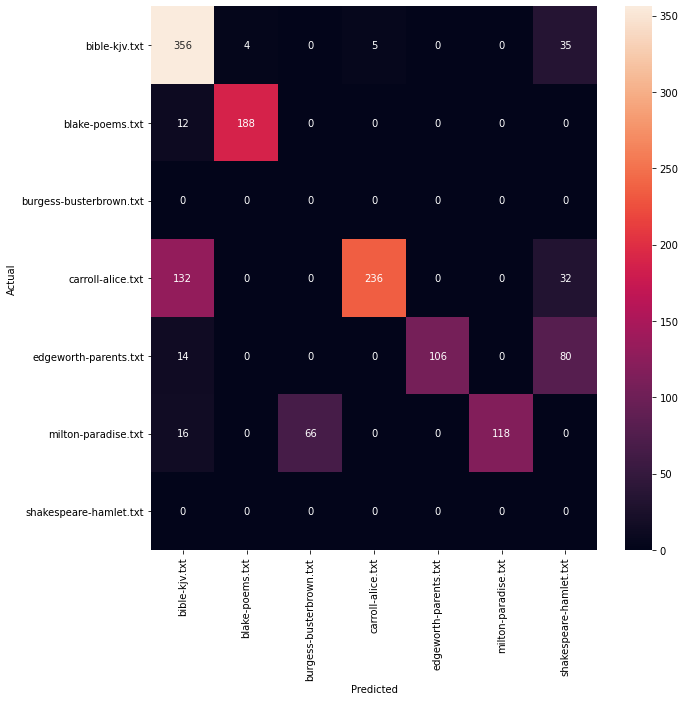

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(df.cluster_id, kmeans_predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=book_id_df.File_name.values, yticklabels=book_id_df.File_name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [14]:
#evaluation of KMeans
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(df.cluster_id, kmeans_predict))

0.6465187452180565


In [15]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
print(homogeneity_score(df.book_id, kmeans_predict))
silhouette_score(features, labels=kmeans_predict)

0.5652940375521592


0.015002556171507425

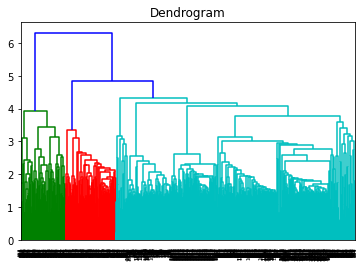

In [16]:
# Using the dendrogram to find the optimal number of clusters (7)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(features.toarray(), method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [17]:
#EM clustering
gmm = GaussianMixture(n_components=7).fit(Y_sklearn)
labels = gmm.predict(Y_sklearn)
labels

array([5, 0, 0, ..., 0, 0, 0])

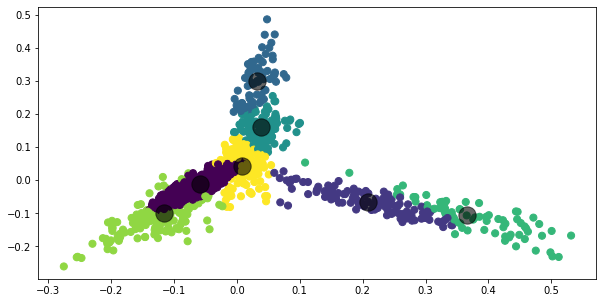

In [18]:
from scipy.stats import multivariate_normal as mvn
centers = np.zeros((7,2))
for i in range(7):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]
plt.figure(figsize = (10,5))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=labels ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.show()

In [19]:
# obtain cluster id from predict result
em_predict = gmm.predict(Y_sklearn)
stat, new_id = statistics(em_predict)
predict_df = pd.DataFrame(stat, index = books, columns=['0', '1', '2', '3', '4', '5', '6'])
print(predict_df)
print(new_id)
# create new book id
ids = []
for k in new_id:
    arr = np.ones(200)
    ids.append(arr * k)
book_cluster_ids = np.array(ids,dtype='int8').flatten()
# assign new book id to the df
df['cluster_id'] = book_cluster_ids
df.cluster_id

                             0     1     2      3      4      5      6
bible-kjv.txt            0.615  0.00  0.00  0.000  0.000  0.385  0.000
blake-poems.txt          0.535  0.01  0.00  0.000  0.000  0.270  0.185
burgess-busterbrown.txt  0.000  0.62  0.00  0.000  0.365  0.000  0.015
carroll-alice.txt        0.005  0.00  0.37  0.505  0.000  0.000  0.120
edgeworth-parents.txt    0.525  0.00  0.00  0.035  0.005  0.000  0.435
milton-paradise.txt      0.905  0.00  0.00  0.000  0.000  0.095  0.000
shakespeare-hamlet.txt   0.965  0.00  0.00  0.000  0.000  0.030  0.005
[0, 0, 1, 3, 0, 0, 0]


0       0
1       0
2       0
3       0
4       0
       ..
1395    0
1396    0
1397    0
1398    0
1399    0
Name: cluster_id, Length: 1400, dtype: int8

In [20]:
#evaluation of EM
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(df.cluster_id, em_predict))

0.45777925531914887


In [21]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
print(homogeneity_score(df.cluster_id, gmm.predict(Y_sklearn)))
silhouette_score(features, labels=gmm.predict(Y_sklearn))

0.8837719288293464


0.00599027511988961

In [22]:
# Hierarchy clustering
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(features.toarray())

print(len(y_hc))
print(y_hc)
hc.n_clusters_

1400
[4 4 4 ... 5 5 5]


7

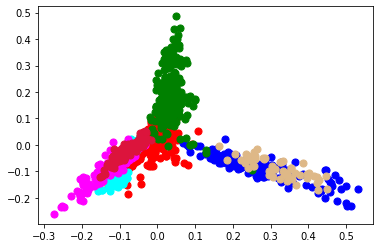

In [23]:
# Visualising the clusters
plt.scatter(Y_sklearn[y_hc == 0, 0], Y_sklearn[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(Y_sklearn[y_hc == 1, 0], Y_sklearn[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(Y_sklearn[y_hc == 2, 0], Y_sklearn[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(Y_sklearn[y_hc == 3, 0], Y_sklearn[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(Y_sklearn[y_hc == 4, 0], Y_sklearn[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(Y_sklearn[y_hc == 5, 0], Y_sklearn[y_hc == 5, 1], s = 50, c = 'crimson', label = 'Cluster 6')
plt.scatter(Y_sklearn[y_hc == 6, 0], Y_sklearn[y_hc == 6, 1], s = 50, c = 'burlywood', label = 'Cluster 7')
plt.show()

In [24]:
# obtain cluster id from predict result
hc_predict = y_hc
stat, new_id = statistics(hc_predict)
predict_df = pd.DataFrame(stat, index = books, columns=['0', '1', '2', '3', '4', '5', '6'])
print(predict_df)
print(new_id)
# create new book id
ids = []
for k in new_id:
    arr = np.ones(200)
    ids.append(arr * k)
book_cluster_ids = np.array(ids,dtype='int8').flatten()
# assign new book id to the df
df['cluster_id'] = book_cluster_ids
df.cluster_id

                             0     1      2     3      4     5     6
bible-kjv.txt            0.160  0.00  0.005  0.00  0.835  0.00  0.00
blake-poems.txt          0.745  0.00  0.000  0.24  0.015  0.00  0.00
burgess-busterbrown.txt  0.015  0.67  0.045  0.00  0.000  0.00  0.27
carroll-alice.txt        0.020  0.00  0.980  0.00  0.000  0.00  0.00
edgeworth-parents.txt    0.975  0.00  0.025  0.00  0.000  0.00  0.00
milton-paradise.txt      0.920  0.00  0.000  0.00  0.080  0.00  0.00
shakespeare-hamlet.txt   0.060  0.00  0.000  0.00  0.000  0.94  0.00
[4, 0, 1, 2, 0, 0, 5]


0       4
1       4
2       4
3       4
4       4
       ..
1395    5
1396    5
1397    5
1398    5
1399    5
Name: cluster_id, Length: 1400, dtype: int8

In [25]:
print(homogeneity_score(df.File_name, hc.labels_))
silhouette_score(features, labels=hc.labels_)

0.6561301956907439


0.015577669597327221